In [1]:
import os
root = os.path.join('..')
data_root = os.path.join(root, 'data')
dataset_root = os.path.join(root, '..', 'datasets')

In [2]:
import sys
sys.path.append(root)

In [3]:
from typing import Tuple, Union

import torch

from utils.fig import Axes, Figure
from utils.interfaces import ResultSynthetic, ResultReal

In [4]:
Figure.set_tex()
Figure.set_high_dpi()

In [5]:
def embed_graph(
    f: Figure,
    ax: Axes, 
    r: Union[ResultSynthetic, ResultReal],
    title: str,
    limits: Tuple[float, float],
    legend: bool = False,
) -> None:

    scatter_o = ax.scatter_o(
        r.projected_X[r.labels == 1][:, 0], 
        r.projected_X[r.labels == 1][:, 1], 
        c=[Figure.palette[0]], 
        edgecolors=Figure.dark_palette[0], 
    )
    scatter_X = ax.scatter_X(
        r.projected_X[r.labels == -1][:, 0], 
        r.projected_X[r.labels == -1][:, 1], 
        c=[Figure.palette[1]], 
        edgecolors=Figure.dark_palette[1], 
    )

    cs = ax.contourf_binary(
        r.meshgrid_x, 
        r.meshgrid_y, 
        r.agreements, 
        colors=[Figure.light_palette[2], (0, 0, 0, .2)],
    )
    contourf_artist = cs.legend_elements()

    c1 = ax.contour_boundary(
        r.meshgrid_x, 
        r.meshgrid_y, 
        r.hat_f, 
        colors=['red'], 
        linestyles=['solid'],
    )
    c1_artist = c1.legend_elements()[0][0]

    c2 = ax.contour_boundary(
        r.meshgrid_x, 
        r.meshgrid_y, 
        r.hat_g, 
        colors=['black'], 
        linestyles=['--'],
    )
    c2_artist = c2.legend_elements()[0][0]

    if legend:
        f.set_lower_center_legend(
            [contourf_artist[0][1], contourf_artist[0][0], c1_artist, c2_artist, scatter_o, scatter_X], 
            [r'$\operatorname{sgn}(f(\bm{z})) = \operatorname{sgn}(g(\bm{z}))$', 
            r'$\operatorname{sgn}(f(\bm{z})) \ne \operatorname{sgn}(g(\bm{z}))$', 
            r'$\hat{f}(\bm{z})=0$', r'$\hat{g}(\bm{z})=0$', 
            'Positive samples', 'Negative samples'],
            offset=(.02, .02),
            ncols=3,
        )

    ax.set_title(title)
    ax.set_xlim(*limits)
    ax.set_ylim(*limits)
    ax.square()

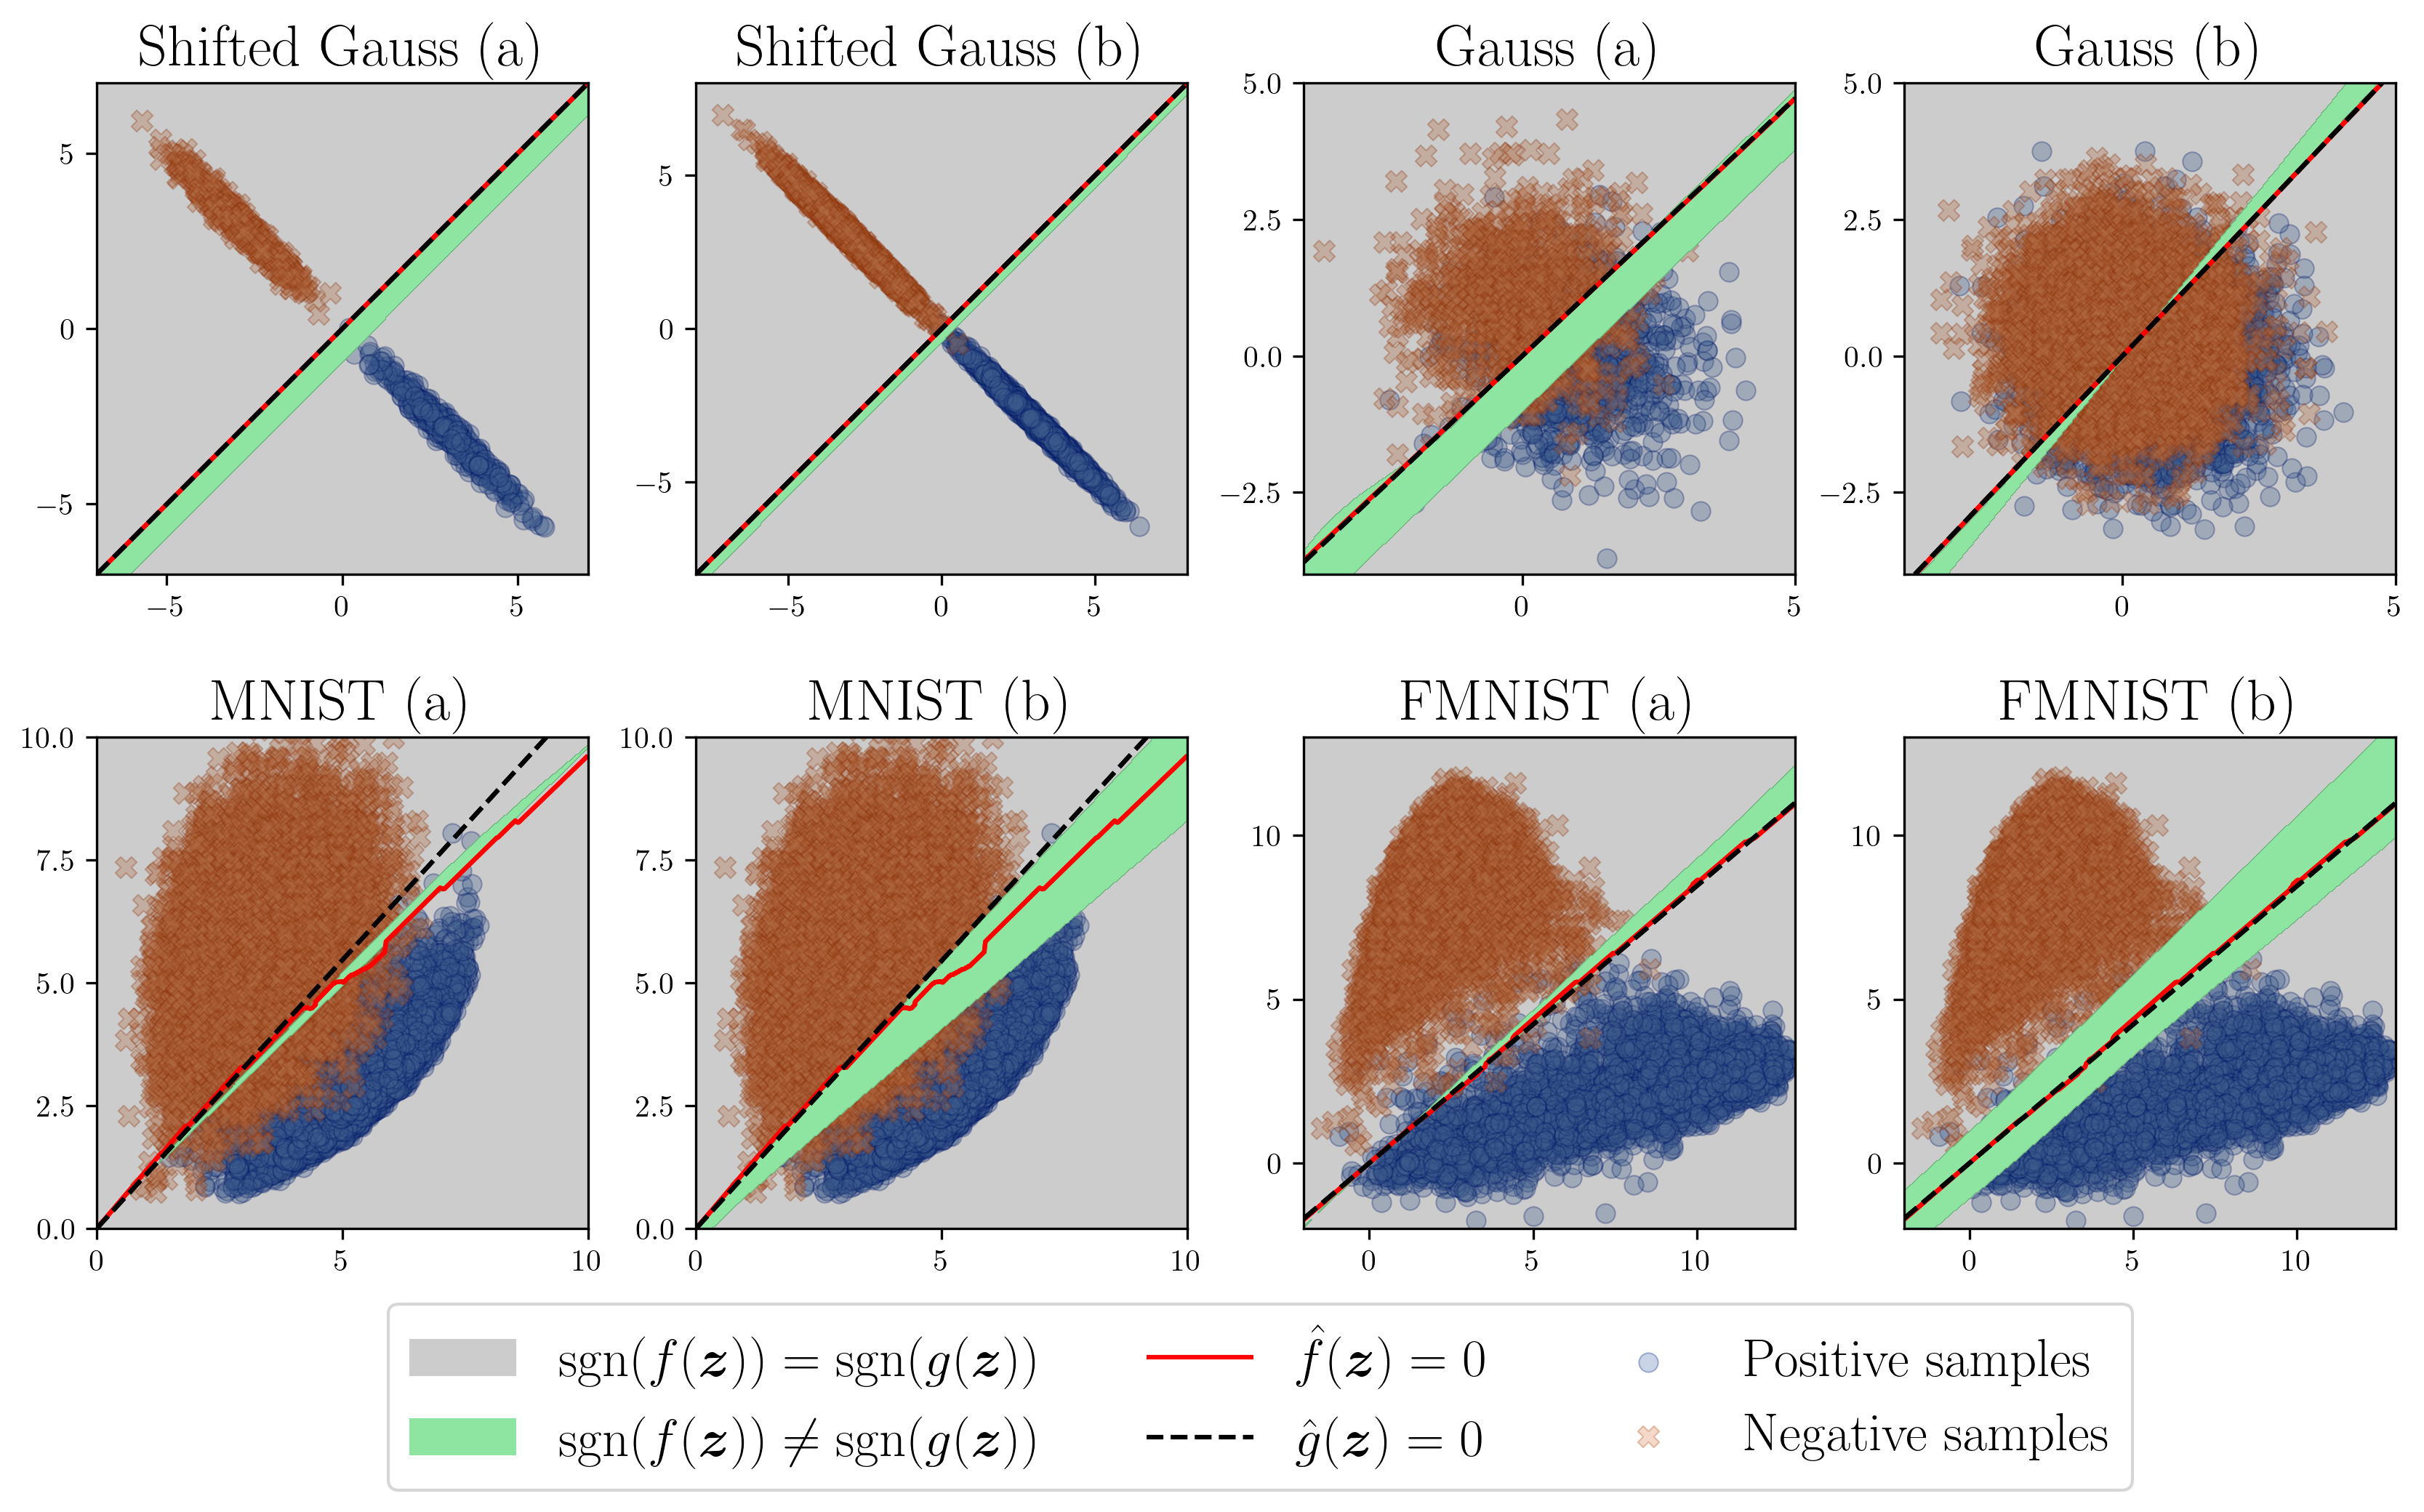

In [6]:
f = Figure(2, 4, (11, 6))
f.set_font_scale(1.6)

# Shifted Gauss a
r = ResultSynthetic(
    data_root=data_root,
    in_dim=100,
    hidden_dim=100,
    slope=0.,
    loss_name='identity',
    epochs_1=100,
    epochs_2=100,
    perturbation_size=.01,
    seed=0,
    on_original=False,
    lr_1=1.,
    lr_2=1.,
    device=torch.device('cpu'),
    data_gen_method='shifted_gauss',
    n_sample=1000,
)
embed_graph(f, f.axes[0][0], r, 'Shifted Gauss (a)', (-7, 7))

# Shifted Gauss b
r = ResultSynthetic(
    data_root=data_root,
    in_dim=100,
    hidden_dim=100,
    slope=0.,
    loss_name='identity',
    epochs_1=100,
    epochs_2=100,
    perturbation_size=.1,
    seed=1,
    on_original=True,
    lr_1=1.,
    lr_2=1.,
    device=torch.device('cpu'),
    data_gen_method='shifted_gauss',
    n_sample=5000,
)
embed_graph(f, f.axes[0][1], r, 'Shifted Gauss (b)', (-8, 8))

# Gauss a
r = ResultSynthetic(
    data_root=data_root,
    in_dim=1000,
    hidden_dim=1000,
    slope=0.,
    loss_name='identity',
    epochs_1=1000,
    epochs_2=1000,
    perturbation_size=.031,
    seed=0,
    on_original=False,
    lr_1=1.,
    lr_2=1.,
    device=torch.device('cpu'),
    data_gen_method='gauss',
    n_sample=2000,
)
embed_graph(f, f.axes[0][2], r, 'Gauss (a)', (-4, 5))

# Gauss b
r = ResultSynthetic(
    data_root=data_root,
    in_dim=1000,
    hidden_dim=1000,
    slope=0.,
    loss_name='identity',
    epochs_1=1000,
    epochs_2=1000,
    perturbation_size=0.31,
    seed=0,
    on_original=True,
    lr_1=.1,
    lr_2=.1,
    device=torch.device('cpu'),
    data_gen_method='gauss',
    n_sample=10000,
)
embed_graph(f, f.axes[0][3], r, 'Gauss (b)', (-4, 5))

# MNIST a
r = ResultReal(
    data_root=data_root,
    hidden_dim=1000,
    slope=0.,
    loss_name='identity',
    epochs_1=100,
    epochs_2=100,
    perturbation_size=.14,
    seed=0,
    on_original=False,
    lr_1=.01,
    lr_2=.01,
    device=torch.device('cpu'),
    dataset_name='MNIST',
    dataset_root=dataset_root,
)
embed_graph(f, f.axes[1][0], r, 'MNIST (a)', (0, 10))

# MNIST b
r = ResultReal(
    data_root=data_root,
    hidden_dim=1000,
    slope=0.,
    loss_name='identity',
    epochs_1=1000,
    epochs_2=1000,
    perturbation_size=.14,
    seed=1,
    on_original=True,
    lr_1=.01,
    lr_2=.01,
    device=torch.device('cpu'),
    dataset_name='MNIST',
    dataset_root=dataset_root,
)
embed_graph(f, f.axes[1][1], r, 'MNIST (b)', (0, 10))

# FMNIST a
r = ResultReal(
    data_root=data_root,
    hidden_dim=1000,
    slope=0.,
    loss_name='identity',
    epochs_1=100,
    epochs_2=100,
    perturbation_size=0.14,
    seed=0,
    on_original=False,
    lr_1=.01,
    lr_2=.01,
    device=torch.device('cpu'),
    dataset_name='FMNIST',
    dataset_root=dataset_root,
)
embed_graph(f, f.axes[1][2], r, 'FMNIST (a)', (-2, 13))

# FMNIST b
r = ResultReal(
    data_root=data_root,
    hidden_dim=1000,
    slope=0.,
    loss_name='identity',
    epochs_1=100,
    epochs_2=100,
    perturbation_size=1.4,
    seed=2,
    on_original=True,
    lr_1=.001,
    lr_2=.001,
    device=torch.device('cpu'),
    dataset_name='FMNIST',
    dataset_root=dataset_root,
)
embed_graph(f, f.axes[1][3], r, 'FMNIST (b)', (-2, 13), True)

f.save(root, 'figs', 'map.pdf')
f.show()
f.close()